## Analysis

Picking up from where we left in R. First we'll import our matchups and xG stats that we've scraped in R.

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
wc_df=pd.read_csv('data/Matchup.csv') #Reading in our Scraped Data 
wc_df

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away
0,Qatar,Ecuador,NaN,NaN,NaN,NaN
1,England,Iran,NaN,NaN,NaN,NaN
2,Senegal,Netherlands,NaN,NaN,NaN,NaN
3,USMNT,Wales,NaN,NaN,NaN,NaN
4,Argentina,Saudi Arabia,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
59,Round of sixteen 3 Winner,Round of sixteen 4 Winner,NaN,NaN,NaN,NaN
60,Quarter-Final 1 Winner,Quarter-Final 2 Winner,NaN,NaN,NaN,NaN
61,Quarter-Final 3 Winner,Quarter-Final 4 Winner,NaN,NaN,NaN,NaN
62,Semi-Final 1 Loser,Semi-Final 2 Loser,NaN,NaN,NaN,NaN


In [3]:
df = pd.read_csv('data/xGData.csv')
df.head()

,TeamName,xGFor,xGAgainst
0,Argentina,1.70,1.09
1,Brazil,2.27,1.03
2,Netherlands,2.22,1.02
3,Spain,1.62,0.68
4,Iran,1.65,1.16


In [4]:
# Preparing our data so that we can merge our two datasets together
df.set_index('TeamName',inplace=True)
df.head()

,xGFor,xGAgainst
TeamName,,
Argentina,1.70,1.09
Brazil,2.27,1.03
Netherlands,2.22,1.02
Spain,1.62,0.68
Iran,1.65,1.16


Mapping our Data so that we can have a combined dataset

In [5]:
wc_df['xG_Home']=wc_df['HomeTeams'].map(df['xGFor'])
wc_df['xGA_Home']=wc_df['HomeTeams'].map(df['xGAgainst'])
wc_df['xG_Away']=wc_df['AwayTeams'].map(df['xGFor'])
wc_df['xGA_Away']=wc_df['AwayTeams'].map(df['xGAgainst'])

In [6]:
wc_df.head()

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away
0,Qatar,Ecuador,1.48,1.28,1.67,1.25
1,England,Iran,2.02,0.92,1.65,1.16
2,Senegal,Netherlands,1.98,1.00,2.22,1.02
3,USMNT,Wales,2.09,1.06,1.48,1.57
4,Argentina,Saudi Arabia,1.70,1.09,1.23,1.28


The Home and Away are being used as mere labels and there is no such advantage associated with the home team although we could probably give a Boost to the actual Home nation Qatar. But as we've seen in the past world cups where weaker teams were host nations, for instance, South Africa in 2010, there isn't much advantage to the host nation unless they are ranked in the top 20 teams in the world.

In order to adjust the xG values according to the Matchup, we are going to multiply the xG values of the team with their opponent's xGA values and divide it by the average xG value for all the 32 teams combined. This method is flexible enough to account for the relative strengths of the teams. For instance, if we have a strong team playing against a weaker team their xG value will go up as their own xG values will be quite high and their opponent's xGA value will also be quite high resulting in a higher adjusted value which depicts their strength comparative to the opponent they are facing.

In [7]:
xG_avg = df['xGFor'].mean()
wc_df['xG_adjusted_Home']= (wc_df['xG_Home'] * wc_df['xGA_Away']) / xG_avg
wc_df['xG_adjusted_Away']= (wc_df['xG_Away'] * wc_df['xGA_Home']) / xG_avg
wc_df.head()

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away
0,Qatar,Ecuador,1.48,1.28,1.67,1.25,1.029744,1.189828
1,England,Iran,2.02,0.92,1.65,1.16,1.304269,0.844947
2,Senegal,Netherlands,1.98,1.00,2.22,1.02,1.124147,1.235693
3,USMNT,Wales,2.09,1.06,1.48,1.57,1.826432,0.873223
4,Argentina,Saudi Arabia,1.70,1.09,1.23,1.28,1.211202,0.746258


In [8]:
xG_avg

1.7965625

Fixing an Issue caused due to mismatch of name for South Korean team

In [9]:
wc_df[wc_df["HomeTeams"]=="Korea Republic"]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away
45,Korea Republic,Portugal,NaN,NaN,1.71,0.9,NaN,NaN


In [10]:
wc_df[wc_df["HomeTeams"]=="South Korea"]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away
29,South Korea,Ghana,1.69,1.05,1.6,1.25,1.175857,0.935119


In [11]:
wc_df[wc_df["AwayTeams"]=="South Korea"]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away
13,Uruguay,South Korea,1.69,1.25,1.69,1.05,0.98772,1.175857


In [12]:
wc_df['HomeTeams']=wc_df['HomeTeams'].str.replace('Korea Republic','South Korea')
wc_df[wc_df["HomeTeams"]=="Korea Republic"]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away


In [13]:
wc_df[wc_df["HomeTeams"]=="South Korea"]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away
29,South Korea,Ghana,1.69,1.05,1.60,1.25,1.175857,0.935119
45,South Korea,Portugal,NaN,NaN,1.71,0.90,NaN,NaN


In [14]:
wc_df['xG_Home']=wc_df['HomeTeams'].map(df['xGFor'])

In [15]:
wc_df['xGA_Home']=wc_df['HomeTeams'].map(df['xGAgainst'])
wc_df['xG_adjusted_Home']= (wc_df['xG_Home'] * wc_df['xGA_Away']) / xG_avg
wc_df['xG_adjusted_Away']= (wc_df['xG_Away'] * wc_df['xGA_Home']) / xG_avg

In [16]:
wc_df[wc_df["HomeTeams"]=="South Korea"]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away
29,South Korea,Ghana,1.69,1.05,1.60,1.25,1.175857,0.935119
45,South Korea,Portugal,1.69,1.05,1.71,0.90,0.846617,0.999409


Now that our data is prepped we are ready to run simulations to predict the outcome of the matchups. For this, we are going to run Simulations 10,000 times and generate a discrete random Poisson distribution of numbers for the predicted number of goals scored by the two teams. Then we compare each instance and calculate the outcome for each of those 10,000 data points. At last, we calculate and report the winning percentages for both teams.

Also not entirely necessary but still we'll calculate the clean sheet probability for each of these matches by using a simple check to calculate the number of times the opponent failed to score a single goal in each of those 10000 simulated matchups

In [17]:
def win_cs(df, home_goals_col, away_goals_col, n=10000):
    home_win_list = []
    away_win_list = []
    home_cs_list = []
    away_cs_list = []
    # Get home and away projected goals for that row
    for i in range(len(df)):
        avg_home_goals = df.iloc[i][home_goals_col]
        avg_away_goals = df.iloc[i][away_goals_col]
        #Creating the list of 10000 random number of goals scored by the 2 teams
        home_goals_sim = np.random.poisson(avg_home_goals, n) 
        away_goals_sim = np.random.poisson(avg_away_goals, n)
        #Creating a dataframe to Store that data
        sim = pd.DataFrame({'home_score': home_goals_sim, 'away_score': away_goals_sim})
        #Calculating the number of times the home team won
        sim['home_win'] = np.where(sim['home_score'] > sim['away_score'], 1, 0)
        #Calculating the number of times the away team won
        sim['away_win'] = np.where(sim['away_score'] > sim['home_score'], 1, 0)
        #Calculating the Clean sheet percentages for both teams
        sim['home_clean_sheet'] = np.where(sim['away_score'] == 0, 1, 0)
        sim['away_clean_sheet'] = np.where(sim['home_score'] == 0, 1, 0)
        #Converting it all to percentages
        home_win_list.append(sim['home_win'].sum() / n)
        away_win_list.append(sim['away_win'].sum() / n)
        home_cs_list.append(sim['home_clean_sheet'].sum() / n)
        away_cs_list.append(sim['away_clean_sheet'].sum() / n)
    
    df['home_win'] = np.asarray(home_win_list)
    df['away_win'] = np.asarray(away_win_list)
    df['home_clean_sheet'] = np.asarray(home_cs_list)
    df['away_clean_sheet'] = np.asarray(away_cs_list)
    return df
    
     
matchups = win_cs(df=wc_df[0:48],home_goals_col='xG_adjusted_Home',away_goals_col='xG_adjusted_Away') #Passing data in the first 48 rows as the remaining fixtures are yet to decided and depend on the outcome of these fixtures
matchups.head()

/var/folders/vk/pg8yqs3n7w3bybkpwxrr4pcr0000gn/T/ipykernel_3056/2581266675.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_win'] = np.asarray(home_win_list)
/var/folders/vk/pg8yqs3n7w3bybkpwxrr4pcr0000gn/T/ipykernel_3056/2581266675.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['away_win'] = np.asarray(away_win_list)
/var/folders/vk/pg8yqs3n7w3bybkpwxrr4pcr0000gn/T/ipykernel_3056/2581266675.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet
0,Qatar,Ecuador,1.48,1.28,1.67,1.25,1.029744,1.189828,0.3125,0.3941,0.2994,0.3571
1,England,Iran,2.02,0.92,1.65,1.16,1.304269,0.844947,0.4745,0.2446,0.4372,0.2753
2,Senegal,Netherlands,1.98,1.00,2.22,1.02,1.124147,1.235693,0.3362,0.3869,0.2972,0.3327
3,USMNT,Wales,2.09,1.06,1.48,1.57,1.826432,0.873223,0.6019,0.1802,0.4108,0.1632
4,Argentina,Saudi Arabia,1.70,1.09,1.23,1.28,1.211202,0.746258,0.4784,0.2223,0.4776,0.2917


In [18]:
wc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HomeTeams         64 non-null     object 
 1   AwayTeams         64 non-null     object 
 2   xG_Home           48 non-null     float64
 3   xGA_Home          48 non-null     float64
 4   xG_Away           48 non-null     float64
 5   xGA_Away          48 non-null     float64
 6   xG_adjusted_Home  48 non-null     float64
 7   xG_adjusted_Away  48 non-null     float64
dtypes: float64(6), object(2)
memory usage: 4.1+ KB


In [19]:
matchups.columns

Index(['HomeTeams', 'AwayTeams', 'xG_Home', 'xGA_Home', 'xG_Away', 'xGA_Away',
       'xG_adjusted_Home', 'xG_adjusted_Away', 'home_win', 'away_win',
       'home_clean_sheet', 'away_clean_sheet'],
      dtype='object')

In [20]:
displaycols = ['HomeTeams', 'xG_adjusted_Home','home_win','home_clean_sheet','AwayTeams','xG_adjusted_Away',  'away_win', 'away_clean_sheet']
matchups[displaycols]

,HomeTeams,xG_adjusted_Home,home_win,home_clean_sheet,AwayTeams,xG_adjusted_Away,away_win,away_clean_sheet
0,Qatar,1.029744,0.3125,0.2994,Ecuador,1.189828,0.3941,0.3571
1,England,1.304269,0.4745,0.4372,Iran,0.844947,0.2446,0.2753
2,Senegal,1.124147,0.3362,0.2972,Netherlands,1.235693,0.3869,0.3327
3,USMNT,1.826432,0.6019,0.4108,Wales,0.873223,0.1802,0.1632
4,Argentina,1.211202,0.4784,0.4776,Saudi Arabia,0.746258,0.2223,0.2917
5,Denmark,1.045998,0.3375,0.3283,Tunisia,1.098598,0.3737,0.3553
6,Mexico,1.498862,0.5588,0.4903,Poland,0.699169,0.1749,0.2251
7,France,1.626050,0.5839,0.4633,Australia,0.766742,0.1710,0.1994
8,Morocco,1.340337,0.3740,0.2659,Croatia,1.321635,0.3644,0.2631
9,Germany,1.476820,0.4332,0.3031,Japan,1.197119,0.3070,0.2319


Creating an Additional metric to determine the games that are most likely to have more than two goals scored and thereby being an entertaining watch

In [21]:
matchups['Expected Goalz'] = matchups['xG_adjusted_Home']+matchups['xG_adjusted_Away']
matchups['CrackeR'] = np.where( matchups['Expected Goalz']>2.5,True,False)
matchups

/var/folders/vk/pg8yqs3n7w3bybkpwxrr4pcr0000gn/T/ipykernel_3056/3830407195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchups['Expected Goalz'] = matchups['xG_adjusted_Home']+matchups['xG_adjusted_Away']
/var/folders/vk/pg8yqs3n7w3bybkpwxrr4pcr0000gn/T/ipykernel_3056/3830407195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchups['CrackeR'] = np.where( matchups['Expected Goalz']>2.5,True,False)


,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet,Expected Goalz,CrackeR
0,Qatar,Ecuador,1.48,1.28,1.67,1.25,1.029744,1.189828,0.3125,0.3941,0.2994,0.3571,2.219572,False
1,England,Iran,2.02,0.92,1.65,1.16,1.304269,0.844947,0.4745,0.2446,0.4372,0.2753,2.149216,False
2,Senegal,Netherlands,1.98,1.00,2.22,1.02,1.124147,1.235693,0.3362,0.3869,0.2972,0.3327,2.359840,False
3,USMNT,Wales,2.09,1.06,1.48,1.57,1.826432,0.873223,0.6019,0.1802,0.4108,0.1632,2.699656,True
4,Argentina,Saudi Arabia,1.70,1.09,1.23,1.28,1.211202,0.746258,0.4784,0.2223,0.4776,0.2917,1.957460,False
5,Denmark,Tunisia,1.62,1.29,1.53,1.16,1.045998,1.098598,0.3375,0.3737,0.3283,0.3553,2.144596,False
6,Mexico,Poland,1.87,0.79,1.59,1.44,1.498862,0.699169,0.5588,0.1749,0.4903,0.2251,2.198031,False
7,France,Australia,2.23,0.95,1.45,1.31,1.626050,0.766742,0.5839,0.1710,0.4633,0.1994,2.392792,False
8,Morocco,Croatia,2.15,1.06,2.24,1.12,1.340337,1.321635,0.3740,0.3644,0.2659,0.2631,2.661973,True
9,Germany,Japan,2.68,1.07,2.01,0.99,1.476820,1.197119,0.4332,0.3070,0.3031,0.2319,2.673940,True


In [22]:
matchups[matchups['CrackeR']==True]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet,Expected Goalz,CrackeR
3,USMNT,Wales,2.09,1.06,1.48,1.57,1.826432,0.873223,0.6019,0.1802,0.4108,0.1632,2.699656,True
8,Morocco,Croatia,2.15,1.06,2.24,1.12,1.340337,1.321635,0.3740,0.3644,0.2659,0.2631,2.661973,True
9,Germany,Japan,2.68,1.07,2.01,0.99,1.476820,1.197119,0.4332,0.3070,0.3031,0.2319,2.673940,True
24,Japan,Costa Rica,2.01,0.99,1.13,1.85,2.069786,0.622689,0.7095,0.1039,0.5357,0.1272,2.692475,True
25,Belgium,Morocco,1.82,1.29,2.15,1.06,1.073828,1.543782,0.2575,0.4942,0.2042,0.3453,2.617610,True
26,Croatia,Canada,2.24,1.12,1.68,1.19,1.483722,1.047333,0.4767,0.2619,0.3542,0.2220,2.531056,True
35,Wales,England,1.48,1.57,2.02,0.92,0.757892,1.765260,0.1629,0.6118,0.1715,0.4655,2.523152,True
41,Croatia,Belgium,2.24,1.12,1.82,1.29,1.608405,1.134611,0.4920,0.2663,0.3263,0.2024,2.743016,True
42,Costa Rica,Germany,1.13,1.85,2.68,1.07,0.673007,2.759715,0.0648,0.8118,0.0614,0.5181,3.432722,True


The above list of fixtures is expected to be a good watch as they are expected to have more than two goals scored. Generally, World cup matches are of high stakes and nobody wants to lose hence everybody plays a little conservatively and we don't get as many free-flowing end-to-end attacking games which is what our simulations are also predicting. Out of the 48 fixtures we are expecting only 9 of them to be entertaining and have more than 2 goals. Most of the matches are quite lopsided which explains why we could see more goals like Germany vs Costa Rica, but there are a few interesting matchups as well between teams of similar strengths like Croatia vs Belgium and USMNT vs Wales.

In [23]:
matchups[(matchups['home_win']>0.5) | (matchups['away_win']>0.5)]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet,Expected Goalz,CrackeR
3,USMNT,Wales,2.09,1.06,1.48,1.57,1.826432,0.873223,0.6019,0.1802,0.4108,0.1632,2.699656,True
6,Mexico,Poland,1.87,0.79,1.59,1.44,1.498862,0.699169,0.5588,0.1749,0.4903,0.2251,2.198031,False
7,France,Australia,2.23,0.95,1.45,1.31,1.626050,0.766742,0.5839,0.1710,0.4633,0.1994,2.392792,False
10,Spain,Costa Rica,1.62,0.68,1.13,1.85,1.668186,0.427706,0.6881,0.0921,0.6487,0.1853,2.095891,False
17,Qatar,Senegal,1.48,1.28,1.98,1.00,0.823795,1.410694,0.2207,0.5077,0.2459,0.4408,2.234489,False
18,Netherlands,Ecuador,2.22,1.02,1.67,1.25,1.544616,0.948144,0.5114,0.2308,0.3962,0.2119,2.492760,False
22,France,Denmark,2.23,0.95,1.62,1.29,1.601225,0.856636,0.5447,0.2055,0.4152,0.2024,2.457860,False
24,Japan,Costa Rica,2.01,0.99,1.13,1.85,2.069786,0.622689,0.7095,0.1039,0.5357,0.1272,2.692475,True
33,Netherlands,Qatar,2.22,1.02,1.48,1.28,1.581687,0.840271,0.5446,0.1969,0.4241,0.2071,2.421959,False
35,Wales,England,1.48,1.57,2.02,0.92,0.757892,1.765260,0.1629,0.6118,0.1715,0.4655,2.523152,True


Now we take a look at the fixtures which according to our simulations are most likely to produce a decisive result heavily favoring a team. We call these the David vs Goliath matchups. It pitches the heavy favorites against the underdogs. 
It is no surprise to see Costa Rica and Qatar heavily feature in this list especially given the fact that Costa Rica is placed in the "Group of Death" alongside highly rated opponents like Germany Spain and Japan. Qatar being one of the lowest ranked teams also feature quite heavily in this list. 
What is Interesting to note here is that Ghana(World Rank 60) being the lowest ranked team doesn't feature in this list even once. One would naturally assume that any team pitted against Ghana would naturally be the favorite in that matchup.

In [24]:
matchups[(matchups['HomeTeams']=="Ghana") | (matchups['AwayTeams']=="Ghana")]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet,Expected Goalz,CrackeR
14,Portugal,Ghana,1.71,0.90,1.60,1.25,1.189772,0.801531,0.4513,0.2505,0.4424,0.3020,1.991303,False
29,South Korea,Ghana,1.69,1.05,1.60,1.25,1.175857,0.935119,0.4111,0.2964,0.3862,0.3061,2.110976,False
44,Ghana,Uruguay,1.60,1.25,1.69,1.25,1.113237,1.175857,0.3365,0.3731,0.3103,0.3345,2.289094,False


As we can see that Ghana although the underdogs in each of these matchups still have a fighting chance against their opponents.
Hence we see the importance of the adjusted xG's as it would've been really easy to assume that Ghana(Rank 60) being the lowest ranked team in the World Cup would have the most difficult time there. But on the contrary, the stats tell us that Costa Rica(Rank 34) is in for a rude awakening as the strengths of their opponents will make it quite difficult for them to take even a point. 

We also see the relative merit of going for xG rather than the actual number of goals scored. If we went according to the results and saw only the final score and based our judgments solely on that we would've seen that Costa Rica has won 8 out of their last 10 games and suffered only 1 defeat in them. Based on that we would've assumed them to be coming into the tournament in red hot form. But as the underlying stats tell us they've barely managed to scrape through and facing more than 50% odds to lose all their three fixtures at the World Cup.

In [25]:
matchups[(matchups['HomeTeams']=="Brazil") | (matchups['AwayTeams']=="Brazil")]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet,Expected Goalz,CrackeR
15,Brazil,Serbia,2.27,1.03,1.71,1.00,1.263524,0.980372,0.4261,0.2840,0.3811,0.2937,2.243896,False
30,Brazil,Switzerland,2.27,1.03,1.84,1.07,1.351971,1.054903,0.4363,0.2852,0.3463,0.2482,2.406874,False
46,Cameroon,Brazil,1.84,1.12,2.27,1.03,1.054903,1.415147,0.2788,0.4530,0.2442,0.3486,2.470050,False


Now lets take a look at some of the Tournament Favourites starting from the number 1 ranked team in the world Brazil. They have a win % of 40+ for each of their matches and should sail through the group stages without any hiccups.

In [26]:
matchups[(matchups['HomeTeams']=="France") | (matchups['AwayTeams']=="France")]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet,Expected Goalz,CrackeR
7,France,Australia,2.23,0.95,1.45,1.31,1.626050,0.766742,0.5839,0.1710,0.4633,0.1994,2.392792,False
22,France,Denmark,2.23,0.95,1.62,1.29,1.601225,0.856636,0.5447,0.2055,0.4152,0.2024,2.457860,False
37,Tunisia,France,1.53,1.16,2.23,0.95,0.809045,1.439861,0.2075,0.5255,0.2388,0.4519,2.248906,False


The World Cup winners curse is an interesting phenomenon that has taken place over the last few world cups starting from Italy in 2006 which won the World Cup in 2006 and crashed out of the 2010 WC in the group stages. Then in 2010, Spain who lifted the Cup in Africa couldn't even make it past the Group stages at their next showing in 2014. A similar fate fell upon Germany who won the 2014 World Cup only to fail at the next one in 2018 after a shocking defeat to South Korea.

2018 World Cup winners France look set to break the WC winners curse as they have a win% of 50+ for all of their mathces.

As we can see their are many interesting storylines at this years World Cup and it would be quite intriguing to watch it unfold in front of our eyes. 

Note: Midway through this assignment I came to the realization that for Data Mining we should be using only Python or Java and not other languages, that's the reason why I switched midway from R to python. Going forward I shall keep this in mind and do all future assignments in Python itself. Thanks for understanding!

Now Let's tabulate result for knockout fixtures

In [28]:
matchups.head()

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet,Expected Goalz,CrackeR
0,Qatar,Ecuador,1.48,1.28,1.67,1.25,1.029744,1.189828,0.3125,0.3941,0.2994,0.3571,2.219572,False
1,England,Iran,2.02,0.92,1.65,1.16,1.304269,0.844947,0.4745,0.2446,0.4372,0.2753,2.149216,False
2,Senegal,Netherlands,1.98,1.00,2.22,1.02,1.124147,1.235693,0.3362,0.3869,0.2972,0.3327,2.359840,False
3,USMNT,Wales,2.09,1.06,1.48,1.57,1.826432,0.873223,0.6019,0.1802,0.4108,0.1632,2.699656,True
4,Argentina,Saudi Arabia,1.70,1.09,1.23,1.28,1.211202,0.746258,0.4784,0.2223,0.4776,0.2917,1.957460,False


First we need a way to award points:

In [29]:
import matplotlib.pyplot as plt

(array([1., 2., 6., 9., 9., 9., 5., 3., 2., 2.]),
 array([0.0648 , 0.12927, 0.19374, 0.25821, 0.32268, 0.38715, 0.45162,
        0.51609, 0.58056, 0.64503, 0.7095 ]),
 <BarContainer object of 10 artists>)

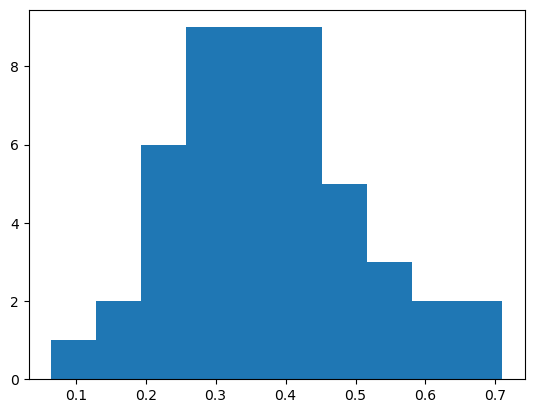

In [31]:
plt.hist(matchups['home_win'])

(array([ 2.,  7., 10., 12.,  6.,  7.,  2.,  1.,  0.,  1.]),
 array([0.0921 , 0.16407, 0.23604, 0.30801, 0.37998, 0.45195, 0.52392,
        0.59589, 0.66786, 0.73983, 0.8118 ]),
 <BarContainer object of 10 artists>)

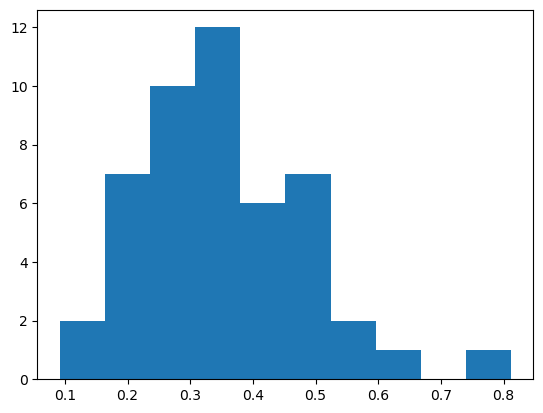

In [32]:
plt.hist(matchups['away_win'])

In [33]:
matchups[matchups['away_win']>0.7]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet,Expected Goalz,CrackeR
42,Costa Rica,Germany,1.13,1.85,2.68,1.07,0.673007,2.759715,0.0648,0.8118,0.0614,0.5181,3.432722,True


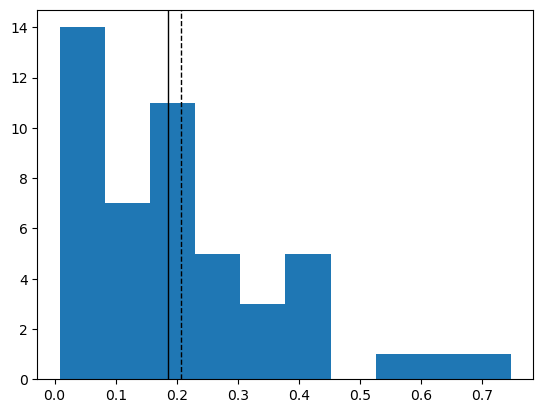

In [53]:
res=plt.hist(abs(matchups['away_win']-matchups['home_win']))
plt.axvline(abs(matchups['away_win']-matchups['home_win']).mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(abs(matchups['away_win']-matchups['home_win']).median(), color='k', linewidth=1)

In [39]:
abs(matchups['away_win']-matchups['home_win']).mean()

0.20694791666666665

In [54]:
abs(matchups['away_win']-matchups['home_win']).median()

0.1864

In [55]:
matchups['outcome']=np.where(matchups['away_win']-matchups['home_win']>0.1864,"away win",np.where((matchups['home_win']-matchups['away_win']>0.1864),"home win","draw"))
matchups.head()

/var/folders/vk/pg8yqs3n7w3bybkpwxrr4pcr0000gn/T/ipykernel_3056/1617567245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchups['outcome']=np.where(matchups['away_win']-matchups['home_win']>0.1864,"away win",np.where((matchups['home_win']-matchups['away_win']>0.1864),"home win","draw"))


,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet,Expected Goalz,CrackeR,outcome
0,Qatar,Ecuador,1.48,1.28,1.67,1.25,1.029744,1.189828,0.3125,0.3941,0.2994,0.3571,2.219572,False,draw
1,England,Iran,2.02,0.92,1.65,1.16,1.304269,0.844947,0.4745,0.2446,0.4372,0.2753,2.149216,False,home win
2,Senegal,Netherlands,1.98,1.00,2.22,1.02,1.124147,1.235693,0.3362,0.3869,0.2972,0.3327,2.359840,False,draw
3,USMNT,Wales,2.09,1.06,1.48,1.57,1.826432,0.873223,0.6019,0.1802,0.4108,0.1632,2.699656,True,home win
4,Argentina,Saudi Arabia,1.70,1.09,1.23,1.28,1.211202,0.746258,0.4784,0.2223,0.4776,0.2917,1.957460,False,home win


In [56]:
matchups[matchups['outcome']=='away win'].count()

HomeTeams           11
AwayTeams           11
xG_Home             11
xGA_Home            11
xG_Away             11
xGA_Away            11
xG_adjusted_Home    11
xG_adjusted_Away    11
home_win            11
away_win            11
home_clean_sheet    11
away_clean_sheet    11
Expected Goalz      11
CrackeR             11
outcome             11
dtype: int64

In [57]:
matchups[matchups['outcome']=='home win'].count()

HomeTeams           13
AwayTeams           13
xG_Home             13
xGA_Home            13
xG_Away             13
xGA_Away            13
xG_adjusted_Home    13
xG_adjusted_Away    13
home_win            13
away_win            13
home_clean_sheet    13
away_clean_sheet    13
Expected Goalz      13
CrackeR             13
outcome             13
dtype: int64

In total we are getting only 24 decisive results out of 48 fixtures which is in keeping with what we see for most world cup matches.

Let's take a at results for our tournament favorites Brazil

In [58]:
matchups[(matchups['HomeTeams']=="Brazil") | (matchups['AwayTeams']=="Brazil")]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet,Expected Goalz,CrackeR,outcome
15,Brazil,Serbia,2.27,1.03,1.71,1.00,1.263524,0.980372,0.4261,0.2840,0.3811,0.2937,2.243896,False,draw
30,Brazil,Switzerland,2.27,1.03,1.84,1.07,1.351971,1.054903,0.4363,0.2852,0.3463,0.2482,2.406874,False,draw
46,Cameroon,Brazil,1.84,1.12,2.27,1.03,1.054903,1.415147,0.2788,0.4530,0.2442,0.3486,2.470050,False,draw


In [59]:
matchups[(matchups['HomeTeams']=="France") | (matchups['AwayTeams']=="France")]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet,Expected Goalz,CrackeR,outcome
7,France,Australia,2.23,0.95,1.45,1.31,1.626050,0.766742,0.5839,0.1710,0.4633,0.1994,2.392792,False,home win
22,France,Denmark,2.23,0.95,1.62,1.29,1.601225,0.856636,0.5447,0.2055,0.4152,0.2024,2.457860,False,home win
37,Tunisia,France,1.53,1.16,2.23,0.95,0.809045,1.439861,0.2075,0.5255,0.2388,0.4519,2.248906,False,away win


In [60]:
matchups['draw_percentage']=1-(matchups['home_win']+matchups['away_win'])
matchups.head()

/var/folders/vk/pg8yqs3n7w3bybkpwxrr4pcr0000gn/T/ipykernel_3056/2585217390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchups['draw_percentage']=1-(matchups['home_win']+matchups['away_win'])


,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet,Expected Goalz,CrackeR,outcome,draw_percentage
0,Qatar,Ecuador,1.48,1.28,1.67,1.25,1.029744,1.189828,0.3125,0.3941,0.2994,0.3571,2.219572,False,draw,0.2934
1,England,Iran,2.02,0.92,1.65,1.16,1.304269,0.844947,0.4745,0.2446,0.4372,0.2753,2.149216,False,home win,0.2809
2,Senegal,Netherlands,1.98,1.00,2.22,1.02,1.124147,1.235693,0.3362,0.3869,0.2972,0.3327,2.359840,False,draw,0.2769
3,USMNT,Wales,2.09,1.06,1.48,1.57,1.826432,0.873223,0.6019,0.1802,0.4108,0.1632,2.699656,True,home win,0.2179
4,Argentina,Saudi Arabia,1.70,1.09,1.23,1.28,1.211202,0.746258,0.4784,0.2223,0.4776,0.2917,1.957460,False,home win,0.2993


(array([ 1.,  0.,  1.,  0.,  3.,  4., 13., 17.,  6.,  3.]),
 array([0.1234 , 0.14493, 0.16646, 0.18799, 0.20952, 0.23105, 0.25258,
        0.27411, 0.29564, 0.31717, 0.3387 ]),
 <BarContainer object of 10 artists>)

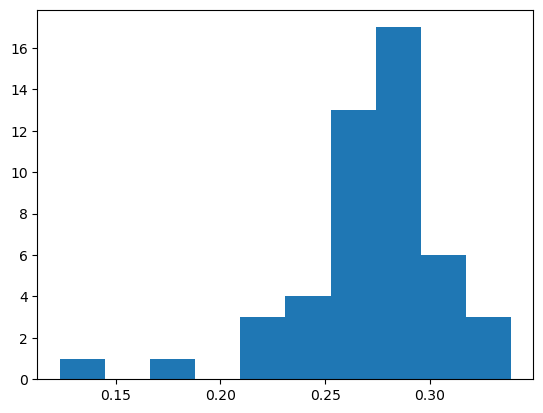

In [61]:
plt.hist(matchups['draw_percentage'])

In [63]:
matchups[(matchups['draw_percentage']>matchups['home_win'])&(matchups['draw_percentage']>matchups['away_win'])]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet,Expected Goalz,CrackeR,outcome,draw_percentage


let's calculate the points group wise:

## Group A

In [64]:
matchups[(matchups['HomeTeams']=='Qatar')|(matchups['HomeTeams']=='Ecuador')|(matchups['HomeTeams']=='Senegal')|(matchups['HomeTeams']=='Netherlands')]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet,Expected Goalz,CrackeR,outcome,draw_percentage
0,Qatar,Ecuador,1.48,1.28,1.67,1.25,1.029744,1.189828,0.3125,0.3941,0.2994,0.3571,2.219572,False,draw,0.2934
2,Senegal,Netherlands,1.98,1.00,2.22,1.02,1.124147,1.235693,0.3362,0.3869,0.2972,0.3327,2.359840,False,draw,0.2769
17,Qatar,Senegal,1.48,1.28,1.98,1.00,0.823795,1.410694,0.2207,0.5077,0.2459,0.4408,2.234489,False,away win,0.2716
18,Netherlands,Ecuador,2.22,1.02,1.67,1.25,1.544616,0.948144,0.5114,0.2308,0.3962,0.2119,2.492760,False,home win,0.2578
32,Ecuador,Senegal,1.67,1.25,1.98,1.00,0.929553,1.377631,0.2503,0.4674,0.2543,0.3890,2.307184,False,away win,0.2823
33,Netherlands,Qatar,2.22,1.02,1.48,1.28,1.581687,0.840271,0.5446,0.1969,0.4241,0.2071,2.421959,False,home win,0.2585


Netherlands and Senegal go through level on points. For sake of simplicity we'll use their matchups win percentages to decide who'll finish first.

Netherlands finish 1st,Senegal 2nd,Ecuador 3rd,Qatar 4th

## Group B

In [65]:
matchups[(matchups['HomeTeams']=='England')|(matchups['HomeTeams']=='Iran')|(matchups['HomeTeams']=='USMNT')|(matchups['HomeTeams']=='Wales')]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet,Expected Goalz,CrackeR,outcome,draw_percentage
1,England,Iran,2.02,0.92,1.65,1.16,1.304269,0.844947,0.4745,0.2446,0.4372,0.2753,2.149216,False,home win,0.2809
3,USMNT,Wales,2.09,1.06,1.48,1.57,1.826432,0.873223,0.6019,0.1802,0.4108,0.1632,2.699656,True,home win,0.2179
16,Wales,Iran,1.48,1.57,1.65,1.16,0.955603,1.441920,0.2526,0.4847,0.2392,0.3868,2.397523,False,away win,0.2627
19,England,USMNT,2.02,0.92,2.09,1.06,1.191832,1.070266,0.3906,0.3220,0.3348,0.2940,2.262098,False,draw,0.2874
34,Iran,USMNT,1.65,1.16,2.09,1.06,0.973526,1.349466,0.2825,0.4462,0.2653,0.3740,2.322992,False,draw,0.2713
35,Wales,England,1.48,1.57,2.02,0.92,0.757892,1.765260,0.1629,0.6118,0.1715,0.4655,2.523152,True,away win,0.2253


England Top the group. Iran and USMNT are level on points so we'll settle it using the win% again

England 1st, USMNT 2nd, Iran 3rd, Wales 4th

## Group C

In [66]:
matchups[(matchups['HomeTeams']=='Argentina')|(matchups['HomeTeams']=='Saudi Arabia')|(matchups['HomeTeams']=='Mexico')|(matchups['HomeTeams']=='Poland')]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet,Expected Goalz,CrackeR,outcome,draw_percentage
4,Argentina,Saudi Arabia,1.70,1.09,1.23,1.28,1.211202,0.746258,0.4784,0.2223,0.4776,0.2917,1.957460,False,home win,0.2993
6,Mexico,Poland,1.87,0.79,1.59,1.44,1.498862,0.699169,0.5588,0.1749,0.4903,0.2251,2.198031,False,home win,0.2663
21,Poland,Saudi Arabia,1.59,1.44,1.23,1.28,1.132830,0.985883,0.3894,0.3161,0.3750,0.3212,2.118713,False,draw,0.2945
23,Argentina,Mexico,1.70,1.09,1.87,0.79,0.747539,1.134556,0.2436,0.4387,0.3276,0.4646,1.882094,False,away win,0.3177
38,Poland,Argentina,1.59,1.44,1.70,1.09,0.964676,1.362602,0.2588,0.4742,0.2483,0.3900,2.327278,False,away win,0.2670
39,Saudi Arabia,Mexico,1.23,1.28,1.87,0.79,0.540866,1.332322,0.1516,0.5644,0.2595,0.5792,1.873188,False,away win,0.2840


Surprisingly Mexico top their group and Argentina come second. Poland and Saudi Arabia level on points hence we use win % of their matchup

Mexico 1st, Argentina 2nd, Poland 3rd, Saudi Arabia 4th

## Group D

In [67]:
matchups[(matchups['HomeTeams']=='France')|(matchups['HomeTeams']=='Australia')|(matchups['HomeTeams']=='Denmark')|(matchups['HomeTeams']=='Tunisia')]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet,Expected Goalz,CrackeR,outcome,draw_percentage
5,Denmark,Tunisia,1.62,1.29,1.53,1.16,1.045998,1.098598,0.3375,0.3737,0.3283,0.3553,2.144596,False,draw,0.2888
7,France,Australia,2.23,0.95,1.45,1.31,1.626050,0.766742,0.5839,0.1710,0.4633,0.1994,2.392792,False,home win,0.2451
20,Tunisia,Australia,1.53,1.16,1.45,1.31,1.115631,0.936232,0.3943,0.3061,0.3920,0.3282,2.051863,False,draw,0.2996
22,France,Denmark,2.23,0.95,1.62,1.29,1.601225,0.856636,0.5447,0.2055,0.4152,0.2024,2.457860,False,home win,0.2498
36,Australia,Denmark,1.45,1.31,1.62,1.29,1.041155,1.181256,0.3160,0.3901,0.3024,0.3525,2.222411,False,draw,0.2939
37,Tunisia,France,1.53,1.16,2.23,0.95,0.809045,1.439861,0.2075,0.5255,0.2388,0.4519,2.248906,False,away win,0.2670


No surprises here as France top their group with maximum points. But we face an intersting challenge here as all other matches end in draw. All these teams have 2 points each. Surprisingly Tunisia have higher win% for their matches against both Denmark and Australia. This could yet be a case of them facing relatively weaker opponents than the other two but unfortunately we don't have any way to counter that. So we'll go with Tunisia coming second and Denmark third based on the individual win percentages

France 1st, Tunisia 2nd, Denmark 3rd, Australia 4th

## Group E

In [68]:
matchups[(matchups['HomeTeams']=='Spain')|(matchups['HomeTeams']=='Costa Rica')|(matchups['HomeTeams']=='Germany')|(matchups['HomeTeams']=='Japan')]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet,Expected Goalz,CrackeR,outcome,draw_percentage
9,Germany,Japan,2.68,1.07,2.01,0.99,1.476820,1.197119,0.4332,0.3070,0.3031,0.2319,2.673940,True,draw,0.2598
10,Spain,Costa Rica,1.62,0.68,1.13,1.85,1.668186,0.427706,0.6881,0.0921,0.6487,0.1853,2.095891,False,home win,0.2198
24,Japan,Costa Rica,2.01,0.99,1.13,1.85,2.069786,0.622689,0.7095,0.1039,0.5357,0.1272,2.692475,True,home win,0.1866
27,Spain,Germany,1.62,0.68,2.68,1.07,0.964843,1.014382,0.3360,0.3551,0.3624,0.3770,1.979224,False,draw,0.3089
42,Costa Rica,Germany,1.13,1.85,2.68,1.07,0.673007,2.759715,0.0648,0.8118,0.0614,0.5181,3.432722,True,away win,0.1234
43,Japan,Spain,2.01,0.99,1.62,0.68,0.760786,0.892705,0.2937,0.3676,0.4118,0.4693,1.653491,False,draw,0.3387


We have yet another three way tie this time between Germany,Japan and Spain. We'll settle it by looking at individaul matchups between them.

Germany 1st, Spain 2nd, Japan 3rd, Costa Rica 4th

## Group F

Belgium, Canada, Morocco and Croatia

In [69]:
matchups[(matchups['HomeTeams']=='Belgium')|(matchups['HomeTeams']=='Canada')|(matchups['HomeTeams']=='Morocco')|(matchups['HomeTeams']=='Croatia')]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet,Expected Goalz,CrackeR,outcome,draw_percentage
8,Morocco,Croatia,2.15,1.06,2.24,1.12,1.340337,1.321635,0.3740,0.3644,0.2659,0.2631,2.661973,True,draw,0.2616
11,Belgium,Canada,1.82,1.29,1.68,1.19,1.205524,1.206304,0.3572,0.3674,0.2903,0.2987,2.411828,False,draw,0.2754
25,Belgium,Morocco,1.82,1.29,2.15,1.06,1.073828,1.543782,0.2575,0.4942,0.2042,0.3453,2.617610,True,away win,0.2483
26,Croatia,Canada,2.24,1.12,1.68,1.19,1.483722,1.047333,0.4767,0.2619,0.3542,0.2220,2.531056,True,home win,0.2614
40,Canada,Morocco,1.68,1.19,2.15,1.06,0.991226,1.424109,0.2600,0.4683,0.2393,0.3732,2.415335,False,away win,0.2717
41,Croatia,Belgium,2.24,1.12,1.82,1.29,1.608405,1.134611,0.4920,0.2663,0.3263,0.2024,2.743016,True,home win,0.2417


This is where we get our first truly shocking result. Morocco are topping the group ahead of Belgium and Croatia.

Morocco 1st, Croatia 2nd, Belgium 3rd, Canada 4th

## Group G

Brazil, Serbia, Switzerland and Cameroon

In [70]:
matchups[(matchups['HomeTeams']=='Brazil')|(matchups['HomeTeams']=='Serbia')|(matchups['HomeTeams']=='Switzerland')|(matchups['HomeTeams']=='Cameroon')]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet,Expected Goalz,CrackeR,outcome,draw_percentage
12,Switzerland,Cameroon,1.84,1.07,1.84,1.12,1.147079,1.095871,0.3659,0.3482,0.3274,0.3179,2.242950,False,draw,0.2859
15,Brazil,Serbia,2.27,1.03,1.71,1.00,1.263524,0.980372,0.4261,0.2840,0.3811,0.2937,2.243896,False,draw,0.2899
28,Cameroon,Serbia,1.84,1.12,1.71,1.00,1.024178,1.066036,0.3359,0.3664,0.3387,0.3637,2.090214,False,draw,0.2977
30,Brazil,Switzerland,2.27,1.03,1.84,1.07,1.351971,1.054903,0.4363,0.2852,0.3463,0.2482,2.406874,False,draw,0.2785
46,Cameroon,Brazil,1.84,1.12,2.27,1.03,1.054903,1.415147,0.2788,0.4530,0.2442,0.3486,2.470050,False,draw,0.2682
47,Serbia,Switzerland,1.71,1.00,1.84,1.07,1.018445,1.024178,0.3452,0.3540,0.3572,0.3639,2.042623,False,draw,0.3008


All matches end in a draw. Here we realise the importance of picking the right kind of threshold as we'll have to go to individual matchups to find the winners of each match seperately

Brazil 1st, Switzerland 2nd, Serbia 3rd, Cameroon 4th

## Group H

In [ ]:
Portugal, Ghana, Uruguay and South Korea

In [71]:
matchups[(matchups['HomeTeams']=='Portugal')|(matchups['HomeTeams']=='Ghana')|(matchups['HomeTeams']=='Uruguay')|(matchups['HomeTeams']=='South Korea')]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away,home_win,away_win,home_clean_sheet,away_clean_sheet,Expected Goalz,CrackeR,outcome,draw_percentage
13,Uruguay,South Korea,1.69,1.25,1.69,1.05,0.987720,1.175857,0.3090,0.3974,0.3135,0.3663,2.163576,False,draw,0.2936
14,Portugal,Ghana,1.71,0.90,1.60,1.25,1.189772,0.801531,0.4513,0.2505,0.4424,0.3020,1.991303,False,home win,0.2982
29,South Korea,Ghana,1.69,1.05,1.60,1.25,1.175857,0.935119,0.4111,0.2964,0.3862,0.3061,2.110976,False,draw,0.2925
31,Portugal,Uruguay,1.71,0.90,1.69,1.25,1.189772,0.846617,0.4419,0.2642,0.4252,0.3023,2.036389,False,draw,0.2939
44,Ghana,Uruguay,1.60,1.25,1.69,1.25,1.113237,1.175857,0.3365,0.3731,0.3103,0.3345,2.289094,False,draw,0.2904
45,South Korea,Portugal,1.69,1.05,1.71,0.90,0.846617,0.999409,0.2957,0.3787,0.3685,0.4348,1.846025,False,draw,0.3256


Portugal top the group thanks to their solitary win over ghana.

Portugal 1st, South Korea 2nd, Uruguay 3rd, Ghana 4th

In [72]:
wc_df[48:]

,HomeTeams,AwayTeams,xG_Home,xGA_Home,xG_Away,xGA_Away,xG_adjusted_Home,xG_adjusted_Away
48,Group A Winner,Group B Second Place,NaN,NaN,NaN,NaN,NaN,NaN
49,Group C Winner,Group D Second Place,NaN,NaN,NaN,NaN,NaN,NaN
50,Group D Winner,Group C Second Place,NaN,NaN,NaN,NaN,NaN,NaN
51,Group B Winner,Group A Second Place,NaN,NaN,NaN,NaN,NaN,NaN
52,Group E Winner,Group F Second Place,NaN,NaN,NaN,NaN,NaN,NaN
53,Group G Winner,Group H Second Place,NaN,NaN,NaN,NaN,NaN,NaN
54,Group F Winner,Group E Second Place,NaN,NaN,NaN,NaN,NaN,NaN
55,Group H Winner,Group G Second Place,NaN,NaN,NaN,NaN,NaN,NaN
56,Round of sixteen 5 Winner,Round of sixteen 6 Winner,NaN,NaN,NaN,NaN,NaN,NaN
57,Round of sixteen 1 Winner,Round of sixteen 2 Winner,NaN,NaN,NaN,NaN,NaN,NaN
